In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LarsCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [3]:
df = pd.read_csv('DataPrepared.csv')

In [4]:
X = df.drop(['title','score'], axis=1)
y = df[['score']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)


In [5]:
ols = LinearRegression()
ols.fit(X_train,y_train)


print(f"r^2 on train data is {ols.score(X_train, y_train)}")
print(f"r^2 on test data is {ols.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(ols.score(X_test, y_test) - ols.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,ols.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,ols.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,ols.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,ols.predict(X_test))}")


r^2 on train data is 0.5261919526117753
r^2 on test data is 0.5189740537956854
r^2 dif on data is 0.007217898816089918

mean absolute error on the train data is is 0.4938526706662203
mean absolute error on the test data is is 0.4975559821473654
mean squared error on the train data is is 0.40589530209312086
mean squared error on the test data is is 0.41044504735978415


In [6]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)

ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
print(f"r^2 on train data is {ridge.score(X_train, y_train)}")
print(f"r^2 on test data is {ridge.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(ridge.score(X_test, y_test) - ridge.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,ridge.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,ridge.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,ridge.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,ridge.predict(X_test))}")


7.087370814634009
r^2 on train data is 0.5252897347357948
r^2 on test data is 0.5210706729755982
r^2 dif on data is 0.004219061760196596

mean absolute error on the train data is is 0.49438633577713925
mean absolute error on the test data is is 0.4962493487538416
mean squared error on the train data is is 0.4066682015813072
mean squared error on the test data is is 0.40865606494545675


In [7]:
y_test_pred = ridge.predict(X_test)
diff_all_shows = np.abs(y_test - y_test_pred)

under_5_mask = y_test < 5
diff_under_5 = diff_all_shows[under_5_mask]

over_5_mask = y_test >= 5
diff_over_5 = diff_all_shows[over_5_mask]

avg_diff_all_shows = np.mean(diff_all_shows)
avg_diff_under_5 = np.mean(diff_under_5)
avg_diff_over_5 = np.mean(diff_over_5)

print()
print(f"Average difference for all shows is {avg_diff_all_shows}")
print(f"Average difference for shows under 5 is {avg_diff_under_5}")
print(f"Average difference for shows over 5 is {avg_diff_over_5}")


Average difference for all shows is 0.4962493487538416
Average difference for shows under 5 is 1.0197978418090567
Average difference for shows over 5 is 0.46813936254953464


In [8]:
lassocv = LassoCV(alphas = alphas, max_iter = 100000)
lassocv.fit(X_train, y_train)
print(lassocv.alpha_)

lasso = Lasso(alpha = lassocv.alpha_, max_iter = 100000)
lasso.fit(X_train, y_train)

print(f"r^2 on train data is {lasso.score(X_train, y_train)}")
print(f"r^2 on test data is {lasso.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(lasso.score(X_test, y_test) - lasso.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,lasso.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,lasso.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,lasso.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,lasso.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005
r^2 on train data is 0.46397347126221145
r^2 on test data is 0.4741890404554344
r^2 dif on data is 0.010215569193222973

mean absolute error on the train data is is 0.5256477024100487
mean absolute error on the test data is is 0.5186993906170767
mean squared error on the train data is is 0.4591957671704137
mean squared error on the test data is is 0.448658759253072


In [9]:
elasticcv = ElasticNetCV(alphas = alphas, max_iter = 100000)
elasticcv.fit(X_train, y_train)
print(elasticcv.alpha_)

elastic = ElasticNet(alpha = elasticcv.alpha_, max_iter = 100000)
elastic.fit(X_train, y_train)

print(f"r^2 on train data is {elastic.score(X_train, y_train)}")
print(f"r^2 on test data is {elastic.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(elastic.score(X_test, y_test) - elastic.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,elastic.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,elastic.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,elastic.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,elastic.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005
r^2 on train data is 0.489376384301896
r^2 on test data is 0.4967392231880581
r^2 dif on data is 0.007362838886162071

mean absolute error on the train data is is 0.5124918979414004
mean absolute error on the test data is is 0.507421259796385
mean squared error on the train data is is 0.4374339521925445
mean squared error on the test data is is 0.4294173630400449


In [10]:
larscv = LarsCV(max_iter = 100000)
larscv.fit(X_train, y_train)
print(larscv.alpha_)

print(f"r^2 on train data is {larscv.score(X_train, y_train)}")
print(f"r^2 on test data is {larscv.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(larscv.score(X_test, y_test) - larscv.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,larscv.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,larscv.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,larscv.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,larscv.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.002028667107902345
r^2 on train data is 0.49643209860345006
r^2 on test data is 0.5041343322929208
r^2 dif on data is 0.007702233689470761

mean absolute error on the train data is is 0.5088285202114039
mean absolute error on the test data is is 0.5046415916834488
mean squared error on the train data is is 0.4313895607903752
mean squared error on the test data is is 0.42310733770622033


In [11]:
rf_regressor = RandomForestRegressor(criterion='absolute_error',n_estimators=150, max_depth=20, min_samples_split=200, min_samples_leaf=50,max_features='log2', random_state=42)

rf_regressor.fit(X_train, y_train)
print(f"r^2 on train data is {rf_regressor.score(X_train, y_train)}")
print(f"r^2 on test data is {rf_regressor.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(rf_regressor.score(X_test, y_test) - rf_regressor.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,rf_regressor.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,rf_regressor.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,rf_regressor.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,rf_regressor.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


r^2 on train data is 0.3770624766922396
r^2 on test data is 0.37706456224074314
r^2 dif on data is 2.085548503560908e-06

mean absolute error on the train data is is 0.5675702847864101
mean absolute error on the test data is is 0.5721519420507056
mean squared error on the train data is is 0.5336494717679795
mean squared error on the test data is is 0.5315321705008118


In [12]:
# df.loc[[0]].drop(['title','score'], axis=1)
for i in range(20):
    print(lasso.predict(df.loc[[i]].drop(['title','score'], axis=1)))
    display(df.loc[[i]])

[7.64343554]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
0,Inu x Boku SS,12,7.63,True,1,24.0,13,False,False,False,...,False,False,True,False,False,False,False,False,True,False


[7.39847498]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
1,Seto no Hanayome,26,7.89,True,1,24.0,16,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[7.12219933]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
2,Shugo Chara!! Doki,51,7.55,True,2,24.0,18,False,False,False,...,False,True,False,False,False,True,False,False,False,False


[6.89577345]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
3,Princess Tutu,38,8.21,True,0,16.0,13,False,False,False,...,False,False,True,False,False,False,False,True,False,False


[7.56352024]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
4,Bakuman. 3rd Season,25,8.67,True,1,24.0,19,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[6.91466202]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
5,Yume-iro Pâtissière,50,8.03,False,4,24.0,19,False,False,False,...,True,False,False,False,False,True,False,False,False,False


[6.8978821]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
6,Ultra Maniac,26,7.26,True,0,24.0,12,False,False,False,...,True,False,False,False,False,False,True,False,False,False


[7.55893162]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
7,Shakugan no Shana II (Second),24,7.72,True,1,24.0,29,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.36897239]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
8,Nodame Cantabile: Paris-hen,11,8.24,False,2,23.0,27,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.38227159]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
9,Ouran Koukou Host Club,26,8.34,True,4,23.0,22,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[7.41565052]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
10,Junjou Romantica 2,12,8.15,True,2,24.0,18,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.23273263]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
11,Kaichou wa Maid-sama!,26,8.2,True,1,24.0,21,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[7.43254697]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
12,Sekaiichi Hatsukoi 2,12,8.23,True,2,24.0,20,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.86902758]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
13,Tonari no Kaibutsu-kun,13,7.71,True,3,24.0,22,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.96250706]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
14,Bleach,366,7.9,True,0,24.0,6,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.34416403]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
15,Chobits,26,7.53,True,0,24.0,7,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[7.65441273]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
16,Kimi ni Todoke,25,8.13,True,1,22.0,14,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.88326703]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
17,Naruto: Shippuuden,500,8.18,True,1,23.0,18,False,False,False,...,False,False,True,False,False,False,False,False,True,False


[7.1705906]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
18,Ranma ½,161,7.85,True,2,24.0,7,False,False,False,...,False,False,False,False,True,False,True,False,False,False


[7.33934525]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
19,Toradora!,25,8.39,True,1,24.0,9,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [13]:
dfDiff = df.copy()
# ols.predict(dfDiff.drop(['title', 'score'], axis=1))
dfDiff['predictedScores'] = rf_regressor.predict(dfDiff.drop(['title', 'score'], axis=1)).round(2)
dfDiff['scoreDiff'] = dfDiff['predictedScores'] - dfDiff['score']
display(dfDiff[['title', 'score' ,'predictedScores','scoreDiff']])
dfDiff[['title', 'score' ,'predictedScores','scoreDiff']].sort_values(by=['scoreDiff'])

,title,score,predictedScores,scoreDiff
0,Inu x Boku SS,7.63,7.27,-0.36
1,Seto no Hanayome,7.89,7.22,-0.67
2,Shugo Chara!! Doki,7.55,7.06,-0.49
3,Princess Tutu,8.21,6.95,-1.26
4,Bakuman. 3rd Season,8.67,7.24,-1.43
...,...,...,...,...
10670,Doupo Cangqiong 2nd Season,7.20,6.68,-0.52
10671,Diamond Fusion,7.27,5.84,-1.43
10672,Hitori no Shita: The Outcast Recap,6.04,6.85,0.81
10673,Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,5.87,6.17,0.30


,title,score,predictedScores,scoreDiff
2663,Shelter,8.41,5.86,-2.55
826,Kimi no Na wa.,9.19,6.88,-2.31
4953,Pingu in the City,8.66,6.37,-2.29
4791,Steins;Gate 0,9.15,6.90,-2.25
9818,Ginga Eiyuu Densetsu,9.11,6.87,-2.24
...,...,...,...,...
2142,Kokuhaku,2.38,6.06,3.68
2821,Abunai Sisters: Koko & Mika,2.61,6.40,3.79
3797,Utsu Musume Sayuri,2.08,6.04,3.96
6554,Hametsu no Mars,2.33,6.46,4.13


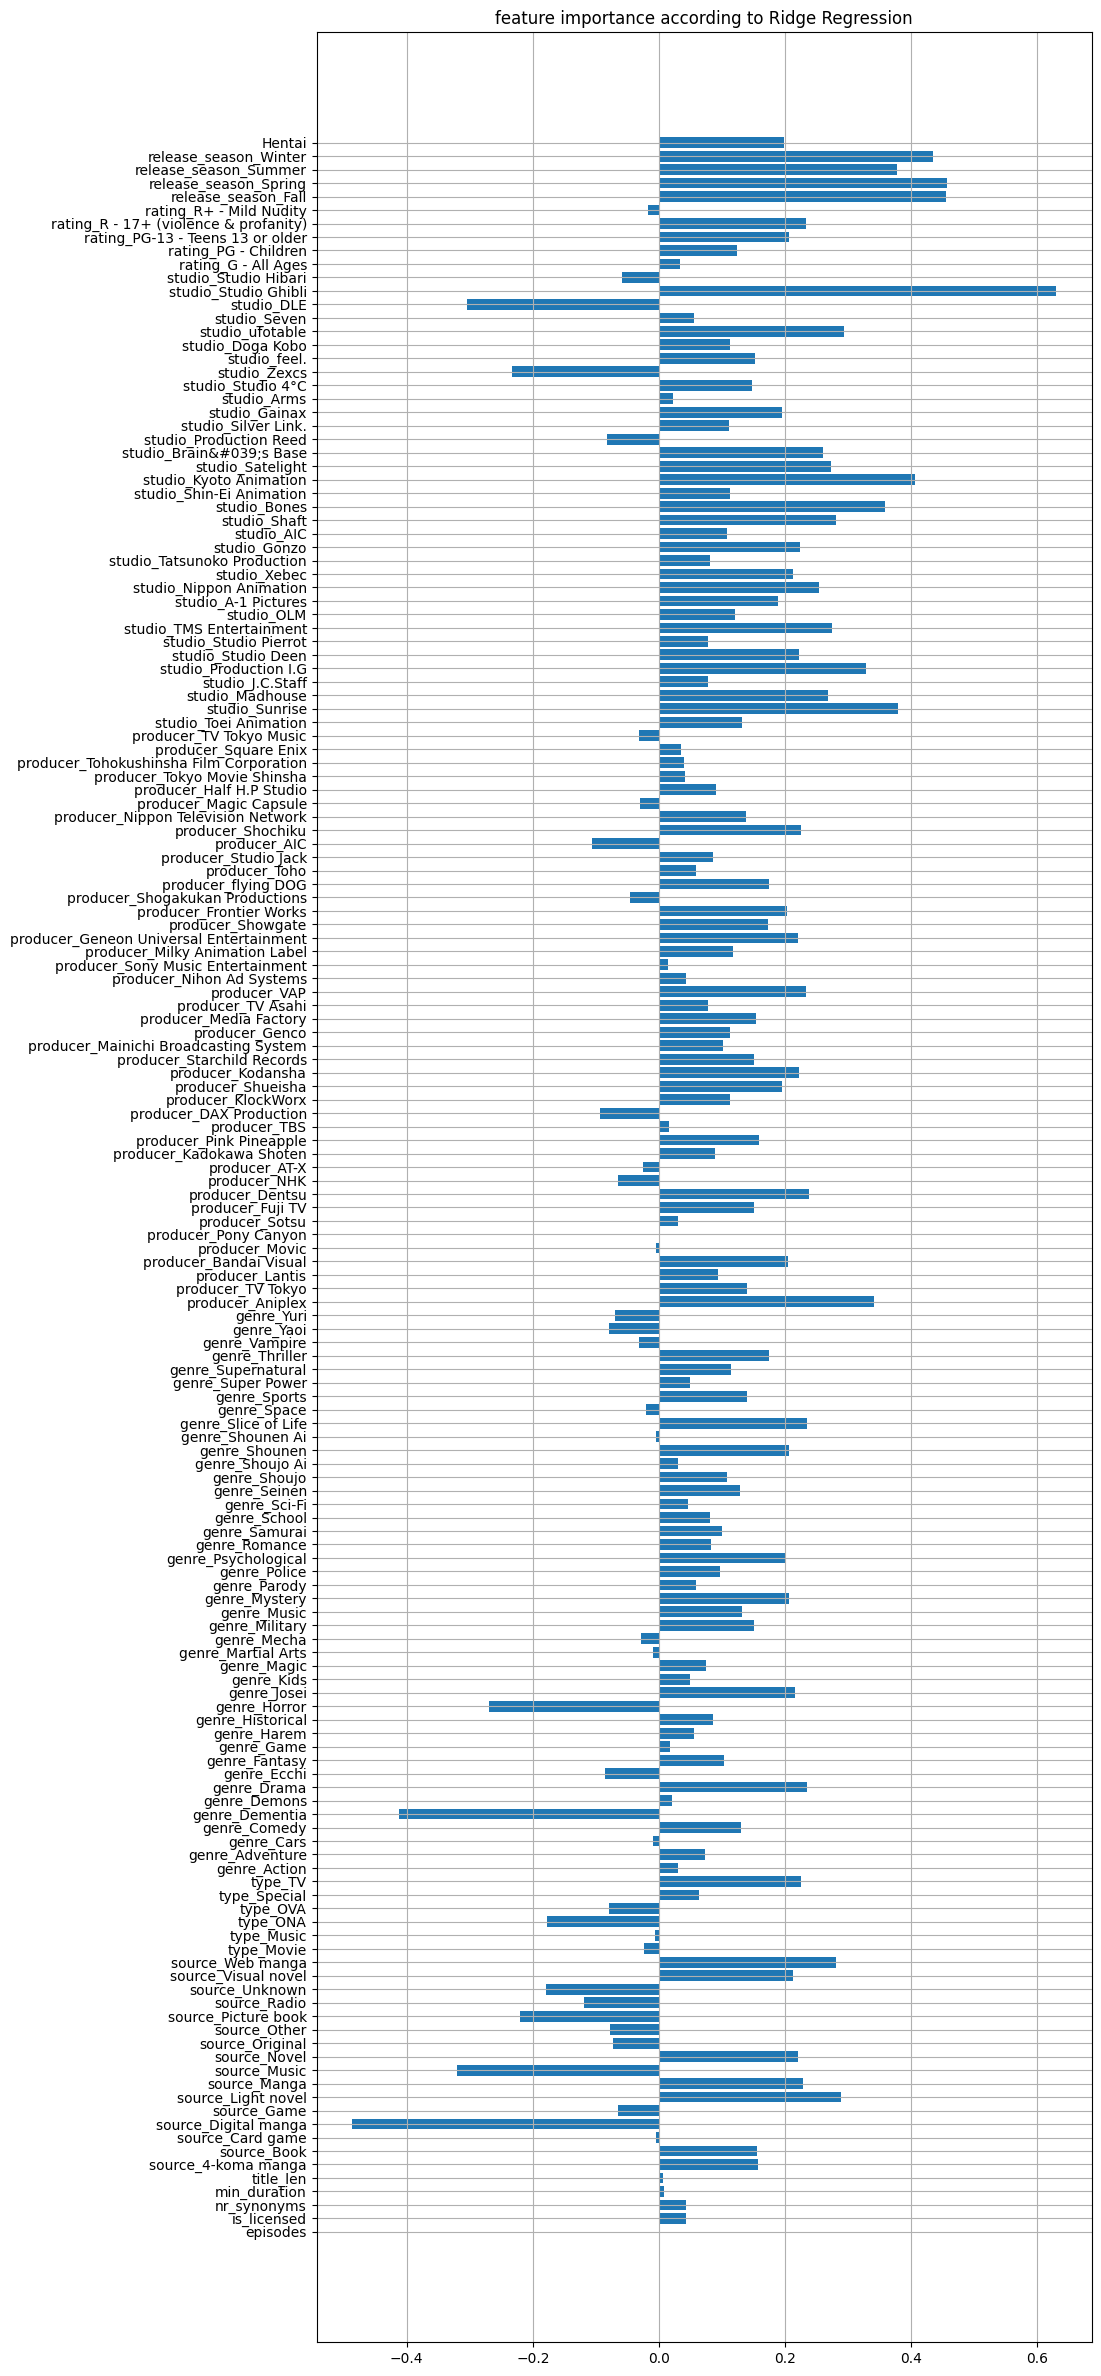

In [14]:
plt.figure(figsize=(10,30))
plt.title('feature importance according to Ridge Regression')
plt.barh(X.columns,ridge.coef_[0], align='center')
plt.grid()
plt.show()

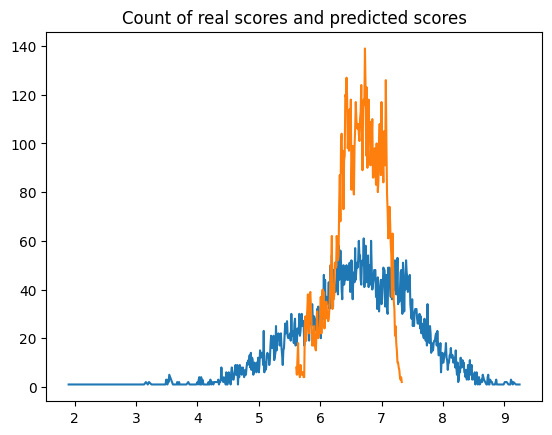

In [15]:
groupedOnScoreCountDiffReal = dfDiff[['score','title']].groupby('score').count()
groupedOnScoreCountDiffPredicted = dfDiff[['predictedScores','title']].groupby('predictedScores').count()
# groupedOnScoreCountDiff
plt.title('Count of real scores and predicted scores')
plt.plot(groupedOnScoreCountDiffReal.index,groupedOnScoreCountDiffReal.values.flat)
plt.plot(groupedOnScoreCountDiffPredicted.index,groupedOnScoreCountDiffPredicted.values.flat)
plt.show()

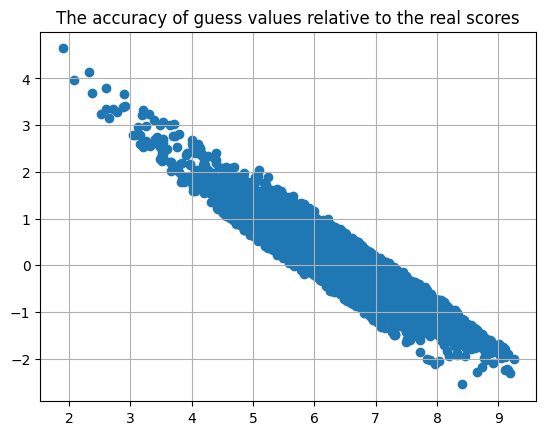

In [16]:
plt.title('The accuracy of guess values relative to the real scores')
plt.scatter(dfDiff['score'],dfDiff['scoreDiff'])
plt.grid()
plt.show()

In [17]:
dfDiffOls = df.copy()
dfDiffOls['predictedScores'] = ols.predict(dfDiffOls.drop(['title', 'score'], axis=1)).round(2)
dfDiffOls['scoreDiff'] = dfDiffOls['predictedScores'] - dfDiffOls['score']

dfDiffRidge = df.copy()
dfDiffRidge['predictedScores'] = ridge.predict(dfDiffRidge.drop(['title', 'score'], axis=1)).round(2)
dfDiffRidge['scoreDiff'] = dfDiffRidge['predictedScores'] - dfDiffRidge['score']

dfDiffLasso = df.copy()
dfDiffLasso['predictedScores'] = lasso.predict(dfDiffLasso.drop(['title', 'score'], axis=1)).round(2)
dfDiffLasso['scoreDiff'] = dfDiffLasso['predictedScores'] - dfDiffLasso['score']

dfDiffElastic = df.copy()
dfDiffElastic['predictedScores'] = elastic.predict(dfDiffElastic.drop(['title', 'score'], axis=1)).round(2)
dfDiffElastic['scoreDiff'] = dfDiffElastic['predictedScores'] - dfDiffElastic['score']

dfDiffLars = df.copy()
dfDiffLars['predictedScores'] = larscv.predict(dfDiffLars.drop(['title', 'score'], axis=1)).round(2)
dfDiffLars['scoreDiff'] = dfDiffLars['predictedScores'] - dfDiffLars['score']

dfDiffRandomTree = df.copy()
dfDiffRandomTree['predictedScores'] = rf_regressor.predict(dfDiffRandomTree.drop(['title', 'score'], axis=1)).round(2)
dfDiffRandomTree['scoreDiff'] = dfDiffRandomTree['predictedScores'] - dfDiffRandomTree['score']


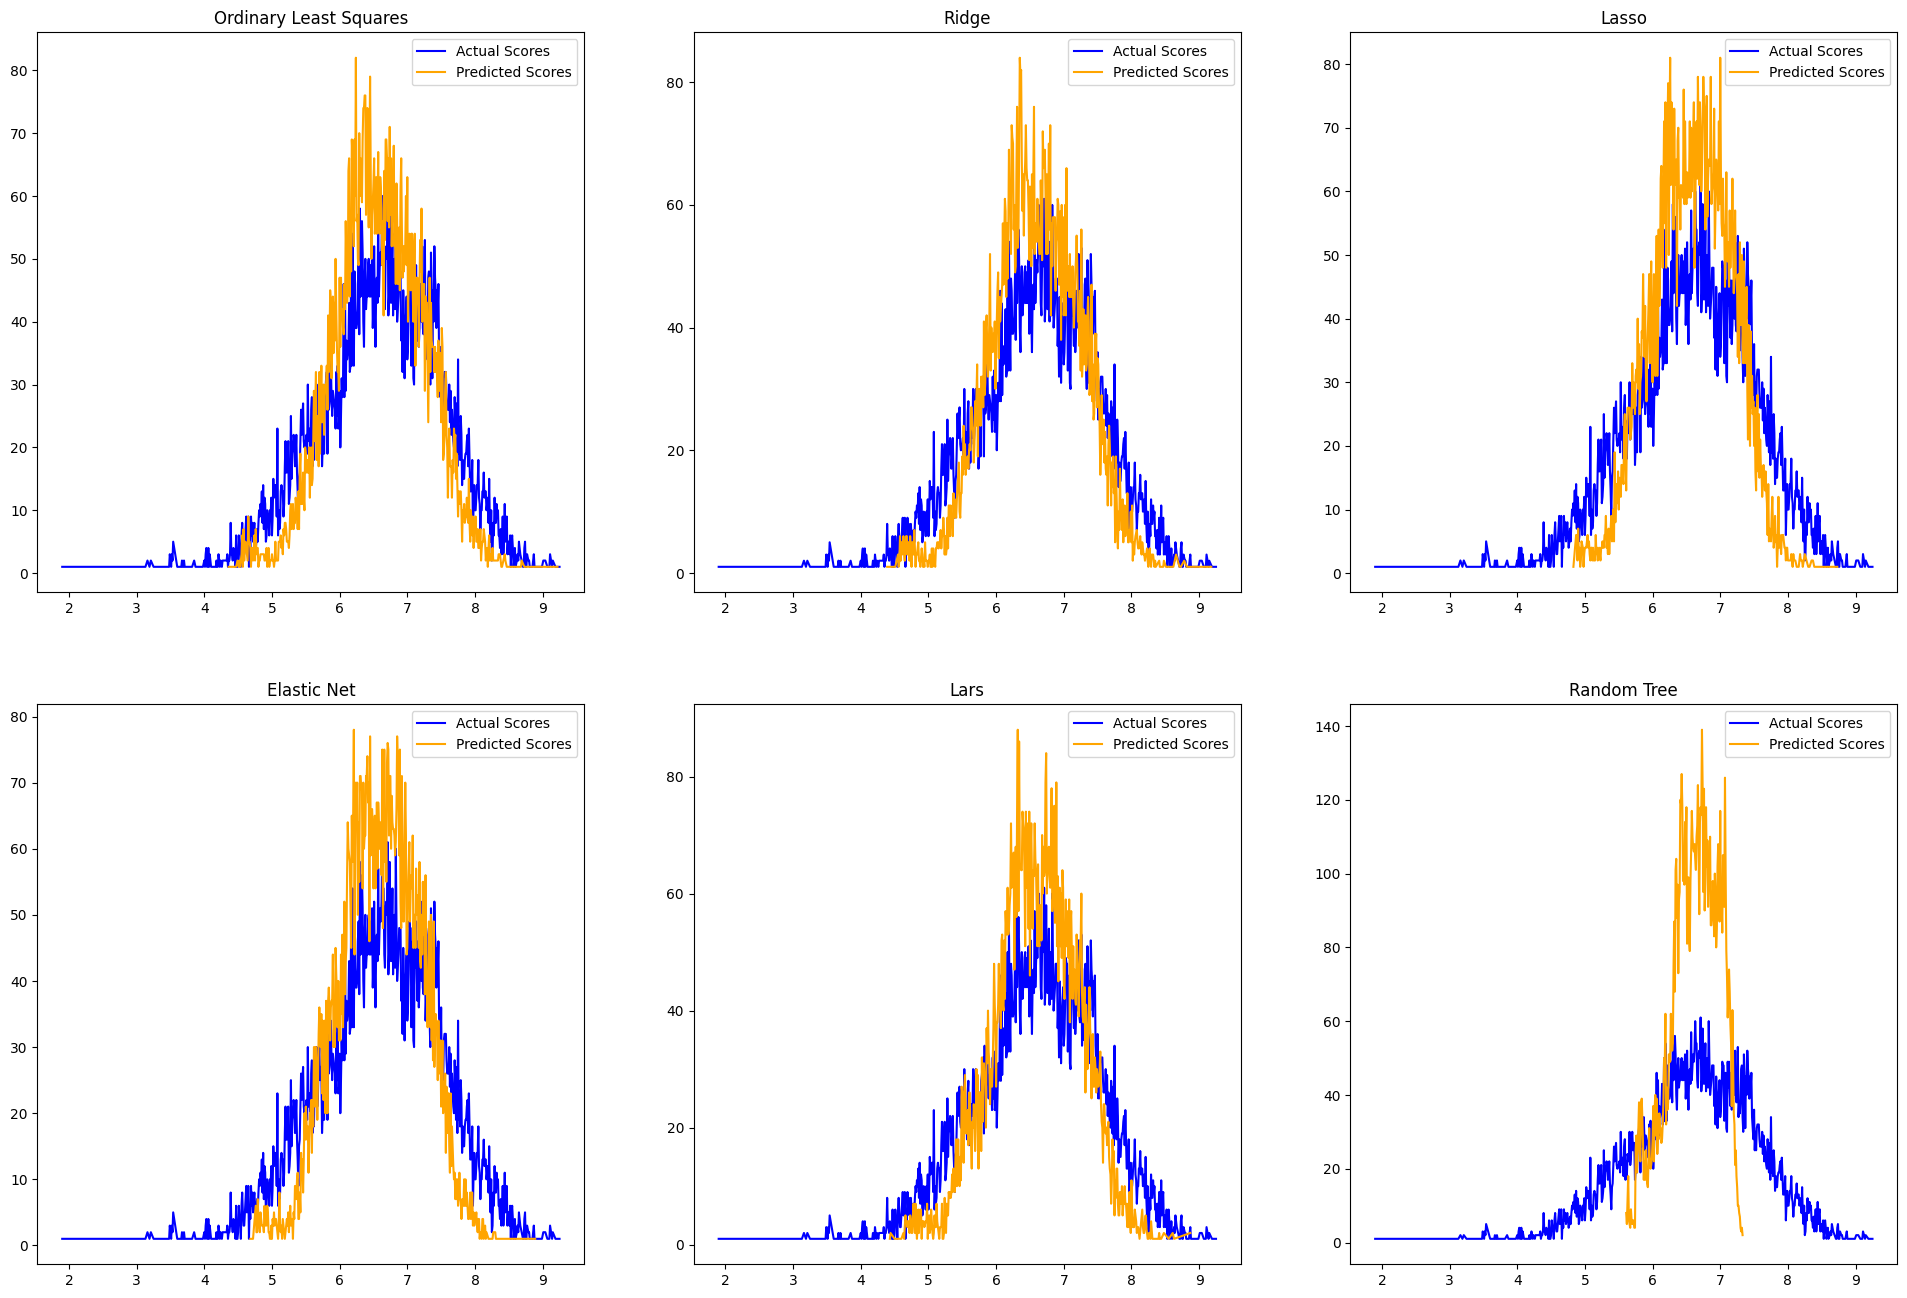

In [19]:
figure, axis = plt.subplots(2, 3)

figure.set_figwidth(24)
figure.set_figheight(16)

actual_color = 'blue'
predicted_color = 'orange'
actual_label = 'Actual Scores'
predicted_label = 'Predicted Scores'

axis[0][0].plot(dfDiffOls[['score', 'title']].groupby('score').count().index,
                dfDiffOls[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[0][0].plot(dfDiffOls[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffOls[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[0][0].set_title('Ordinary Least Squares')
axis[0][0].legend()

axis[0][1].plot(dfDiffRidge[['score', 'title']].groupby('score').count().index,
                dfDiffRidge[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[0][1].plot(dfDiffRidge[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffRidge[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[0][1].set_title('Ridge')
axis[0][1].legend()

axis[0][2].plot(dfDiffLasso[['score', 'title']].groupby('score').count().index,
                dfDiffLasso[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[0][2].plot(dfDiffLasso[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffLasso[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[0][2].set_title('Lasso')
axis[0][2].legend()

axis[1][0].plot(dfDiffElastic[['score', 'title']].groupby('score').count().index,
                dfDiffElastic[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[1][0].plot(dfDiffElastic[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffElastic[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[1][0].set_title('Elastic Net')
axis[1][0].legend()

axis[1][1].plot(dfDiffLars[['score', 'title']].groupby('score').count().index,
                dfDiffLars[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[1][1].plot(dfDiffLars[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffLars[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[1][1].set_title('Lars')
axis[1][1].legend()

axis[1][2].plot(dfDiffRandomTree[['score', 'title']].groupby('score').count().index,
                dfDiffRandomTree[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[1][2].plot(dfDiffRandomTree[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffRandomTree[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[1][2].set_title('Random Tree')
axis[1][2].legend()

plt.show()